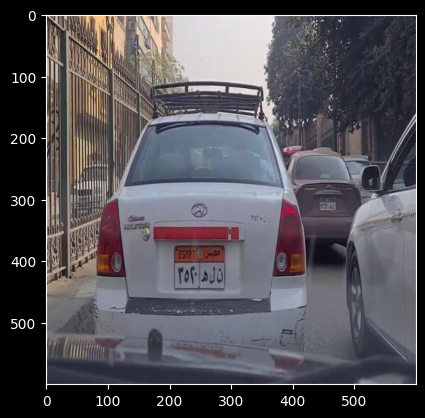

In [14]:
# read the image
# using matplotlib
from matplotlib import image
from matplotlib import pyplot
import numpy as np
# load image as pixel array
imag_pth='images/test.jpg'
data = image.imread(imag_pth)
# plot image
pyplot.imshow(data)

In [15]:
! yolo task=detect \
mode=predict \
model=Recognizers/colo.pt \
conf=0.25 \
source='images/test.jpg'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /run/media/ahmed/Hay/Egyptian plate cars recognizer/Egyptian plate cars recognizer/images/test.jpg: 608x608 5 cars, 7.5ms
Speed: 22.9ms preprocess, 7.5ms inference, 55.6ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict


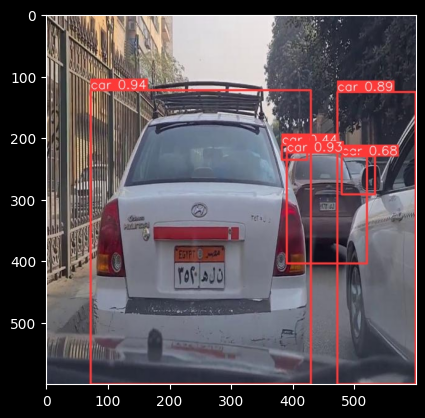

In [16]:
pre = image.imread('runs/detect/predict/test.jpg')
# plot image
pyplot.imshow(pre)

In [17]:
# read colo model ==> car reconizer using yolov8
from ultralytics import YOLO

colo = YOLO("Recognizers/colo.pt")

In [18]:
cars = colo(data)  # list of Results objects



0: 608x608 3 cars, 7.5ms
Speed: 9.8ms preprocess, 7.5ms inference, 9.4ms postprocess per image at shape (1, 3, 608, 608)


In [19]:
cars

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'motorbike', 2: 'person'}
 orig_img: array([[[193, 194, 180],
         [183, 184, 170],
         [131, 129, 116],
         ...,
         [ 41,  43,  55],
         [ 35,  37,  49],
         [ 32,  34,  46]],
 
        [[145, 146, 132],
         [185, 186, 172],
         [181, 179, 166],
         ...,
         [ 41,  43,  55],
         [ 35,  37,  49],
         [ 33,  35,  47]],
 
        [[ 73,  71,  58],
         [140, 138, 125],
         [191, 189, 176],
         ...,
         [ 39,  41,  53],
         [ 35,  37,  49],
         [ 33,  35,  47]],
 
        ...,
 
        [[ 40,  43,  58],
         [ 40,  43,  58],
         [ 40,  43,  58],
         ...,
         [ 55,  61,  73],
         [ 55,  61,  73],
         [ 55,  61,  73]],
 
        [[ 40,  43,  58],
         [ 40,  43,  58],
         [ 40,  

In [20]:
# get cars boxes cars is the 0 class

cars_boxes = cars[0].boxes
cars_boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[ 73.9711, 133.3519, 430.9187, 600.0000,   0.9132,   0.0000],
        [476.2758, 133.3343, 600.0000, 599.2531,   0.8875,   0.0000],
        [389.3982, 220.2693, 518.9637, 402.1922,   0.8786,   0.0000]], device='cuda:0')
cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.9132, 0.8875, 0.8786], device='cuda:0')
data: tensor([[ 73.9711, 133.3519, 430.9187, 600.0000,   0.9132,   0.0000],
        [476.2758, 133.3343, 600.0000, 599.2531,   0.8875,   0.0000],
        [389.3982, 220.2693, 518.9637, 402.1922,   0.8786,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([600, 600], device='cuda:0')
shape: torch.Size([3, 6])
xywh: tensor([[252.4449, 366.6760, 356.9476, 466.6481],
        [538.1379, 366.2937, 123.7242, 465.9188],
        [454.1810, 311.2307, 129.5655, 181.9228]], device='cuda:0')
xywhn: tensor([[0.4207, 0.6111, 0.5949, 0.7777],
        [0.8969, 0.6105, 0.2062, 0.7765],
     

In [21]:
o=0
cars_bounds = []
for i in cars_boxes:
    if i.cls == 0:
        print(i.xyxy)
        cars_bounds.append(i.xywh)
        o+=1
print(o)

tensor([[ 73.9711, 133.3519, 430.9187, 600.0000]], device='cuda:0')
tensor([[476.2758, 133.3343, 600.0000, 599.2531]], device='cuda:0')
tensor([[389.3982, 220.2693, 518.9637, 402.1922]], device='cuda:0')
3


In [22]:
cars_bounds

[tensor([[252.4449, 366.6760, 356.9476, 466.6481]], device='cuda:0'),
 tensor([[538.1379, 366.2937, 123.7242, 465.9188]], device='cuda:0'),
 tensor([[454.1810, 311.2307, 129.5655, 181.9228]], device='cuda:0')]

In [23]:
# crop the cars from the image and add them to temp folder
import cv2
import os

# Create target Directory if don't exist
if not os.path.exists('temp'):
    os.mkdir('temp')
    print("Directory " , 'temp' ,  " Created ")
else:
    print("Directory " , 'temp' ,  " already exists")
    # remove all files in temp folder
    for filename in os.listdir('temp'):
        file_path = os.path.join('temp', filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

Directory  temp  Created 


In [24]:
# crop the cars from the image and add them to temp folder using xywh
for i in range(len(cars_bounds)):
    x,y,w,h = cars_bounds[i][0]
    #x,y are the center of the box
    x_top_left= int(x - w/2)
    y_top_left= int(y - h/2)
    x_bottom_right= int(x + w/2)
    y_bottom_right= int(y + h/2)
    # crop the image
    crop_img = data[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
    #convert the image to RGB
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    # save the image
    cv2.imwrite('temp/car'+str(i)+'.jpg', crop_img)
    



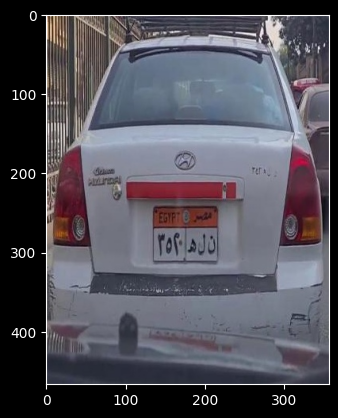

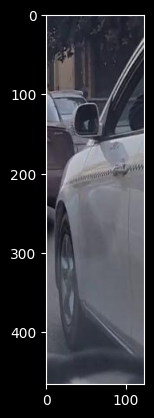

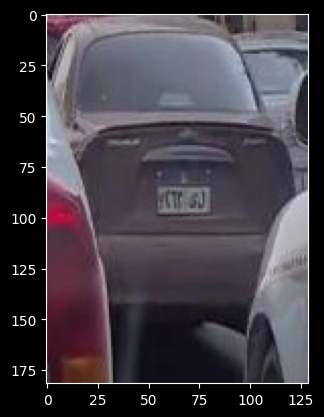

In [25]:
# read the croped images and predict the car model
corped_cars = []
for filename in os.listdir('temp'):
    file_path = os.path.join('temp', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    corped_cars.append(data)
    #print(corped_cars)